## Retinopatía diabética 🧐

Retinopatía diabética
La retinopatía diabética (DR), también conocida como enfermedad ocular diabética, es una afección médica en la que se produce daño en la retina debido a la diabetes mellitus. Es una de las principales causas de ceguera. La retinopatía diabética afecta hasta el 80 por ciento de las personas que han tenido diabetes durante 20 años o más. La retinopatía diabética a menudo no presenta signos de advertencia tempranos. La fotografía de la retina (fondo de ojo) con interpretación manual es una herramienta de detección ampliamente aceptada para la retinopatía diabética, con un rendimiento que puede exceder al de los exámenes dilatados de los ojos en persona.


### Retos:
Reducción de los efectos de las condiciones de iluminación:  las imágenes vienen con diferentes condiciones de iluminación, algunas imágenes son muy oscuras y difíciles de visualizar. 

*posibles soluciones*:
* convertir la imagen a escala de grises y visualizarla mejor. 
* Recorte del área no informativa


## 🤓Una mirada a los datos:
### 🐥Descripción de los datos de la competencia:

Se proporciona un gran conjunto de imágenes de retina de alta resolución tomadas en una variedad de condiciones de imagen. Un campo izquierdo y derecho se proporciona para cada tema. 
Las imágenes se etiquetan con un ID de sujeto, así como a la izquierda o a la derecha (por ejemplo, 1_left.jpeg es el ojo izquierdo del ID de paciente 1).

Un médico ha calificado la presencia de retinopatía diabética en cada imagen en una escala de 0 a 4, de acuerdo con la siguiente escala:

0 - No DR

1 - Suave

2 - Moderado

3 - Severo

4 - DR proliferativo

#### 📝La tarea es crear un sistema de análisis automatizado capaz de asignar una puntuación basada en esta escala.

...

Al igual que cualquier conjunto de datos del mundo real, los datos tiene ruido tanto en las imágenes como en las etiquetas. Las imágenes pueden contener artefactos, estar desenfocadas, subexpuestas o sobreexpuestas. Un objetivo principal de esta competencia es desarrollar algoritmos robustos que puedan funcionar en presencia de ruido y variación

In [74]:
import os, sys
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

import cv2
from sklearn.utils import class_weight, shuffle
from keras.losses import binary_crossentropy
from keras.applications.resnet50 import preprocess_input
import keras.backend as K
import tensorflow as tf
from sklearn.metrics import f1_score, fbeta_score
from keras.utils import Sequence
from keras.utils import to_categorical
from sklearn.model_selection import train_test_split

WORKERS = 2
CHANNEL = 3

import warnings
warnings.filterwarnings("ignore")
IMG_SIZE = 512
NUM_CLASSES = 5
SEED = 77
TRAIN_NUM = 1000 # use 1000 when you just want to explore new idea, use -1 for full train
%config IPCompleter.greedy=True


In [75]:

path="E:/aptos2019-blindness-detection/"

df_train = pd.read_csv('E:/aptos2019-blindness-detection/train.csv')
df_test = pd.read_csv('E:/aptos2019-blindness-detection/test.csv')

x = df_train['id_code']
y = df_train['diagnosis']
x, y = shuffle(x, y, random_state=SEED)


(3112,) (3112,) (550,) (550,)


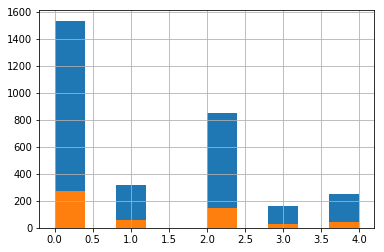

In [55]:
train_x, valid_x, train_y, valid_y = train_test_split(x, y, test_size=0.15,
                                                      stratify=y, random_state=SEED)
train_x, valid_x, train_y, valid_y = train_test_split(x, y, test_size=0.15,
                                                      stratify=y, random_state=SEED)
print(train_x.shape, train_y.shape, valid_x.shape, valid_y.shape)
train_y.hist()
valid_y.hist()

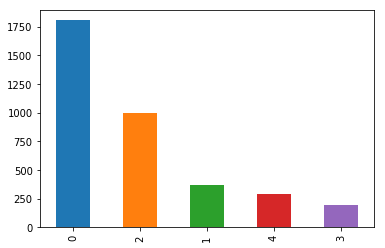

In [76]:
train['diagnosis'].value_counts().plot(kind ='bar')

In [77]:
from keras.preprocessing import image
from keras.applications.imagenet_utils import preprocess_input
img = image.load_img(path+ 'train_images/'+ train['id_code'][0]+ '.png', target_size =(100,100,3))

## 💊Tratamiento de la retinopatía diabética

*Signos y síntomas*
Los diabéticos deben buscar tratamiento de inmediato si experimentan:

- Visión borrosa, nublada
- Flotadores o manchas oscuras en su campo de visión.
- Pérdida de la visión central, especialmente al leer y conducir.
- Problemas para conducir o ver en la noche
- Visión fluctuante
- Visión de color comprometida
- Pérdida de la visión

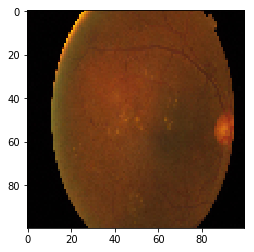

In [78]:
plt.imshow(img)

In [79]:
train_images_list = path + "/train_images"
print("{} train images".format(len(train_images_list)))

46 train images
